<h1>Pilot Study Analysis</h1>

In [16]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_columns', None)

<h2>Reading the Data</h2>

In [17]:
pilot = pd.read_csv('/Users/gokcegozek/Desktop/data-honors/pilot study data/player.csv')
pilot2 = pd.read_csv('/Users/gokcegozek/Desktop/data-honors/pilot study data 2/player.csv')
pilot = pd.concat([pilot, pilot2], axis=0, ignore_index=True)
pilot

,id,age,ageLastChangedAt,bodyType,bodyTypeLastChangedAt,ended,endedLastChangedAt,ethnicity,ethnicityLastChangedAt,exitComments,exitCommentsLastChangedAt,gameID,gameIDLastChangedAt,gender,genderLastChangedAt,imageQuality,imageQualityLastChangedAt,income,incomeLastChangedAt,intro,introLastChangedAt,introDone,introDoneLastChangedAt,name_Bottom_AIRism Soft Ribbed Flare Leggings_$39.90,name_Bottom_AIRism Soft Ribbed Flare Leggings_$39.90LastChangedAt,name_Bottom_Drape Easy Wide Pants_$29.90,name_Bottom_Drape Easy Wide Pants_$29.90LastChangedAt,name_Bottom_Jersey Barrel Pants_$49.90,name_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,name_Bottom_Linen Blend Easy Pants Striped_$29.90,name_Bottom_Linen Blend Easy Pants Striped_$29.90LastChangedAt,name_Bottom_Linen Blend Easy Pants_$29.90,name_Bottom_Linen Blend Easy Pants_$29.90LastChangedAt,name_Bottom_Pleated Wide Pants_$49.90,name_Bottom_Pleated Wide Pants_$49.90LastChangedAt,name_Bottom_Straight Jeans_$49.90,name_Bottom_Straight Jeans_$49.90LastChangedAt,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,name_Bottom_Washable Ribbed Knit Pants_$29.90,name_Bottom_Washable Ribbed Knit Pants_$29.90LastChangedAt,name_Bottom_Wide Straight Jeans_$49.90,name_Bottom_Wide Straight Jeans_$49.90LastChangedAt,name_Dress_Active Dress_$59.90,name_Dress_Active Dress_$59.90LastChangedAt,name_Dress_Combination Dress Sleeveless_$39.90,name_Dress_Combination Dress Sleeveless_$39.90LastChangedAt,name_Dress_Cotton Gathered Mini Dress_$39.90,name_Dress_Cotton Gathered Mini Dress_$39.90LastChangedAt,name_Dress_Crepe Jersey Bra Camisole Dress_$39.90,name_Dress_Crepe Jersey Bra Camisole Dress_$39.90LastChangedAt,name_Dress_Gathered Dress_$59.90,name_Dress_Gathered Dress_$59.90LastChangedAt,name_Dress_Halter Neck Dress_$49.90,name_Dress_Halter Neck Dress_$49.90LastChangedAt,name_Dress_Linen Blend Camisole Dress | Striped_$59.90,name_Dress_Linen Blend Camisole Dress | Striped_$59.90LastChangedAt,name_Dress_Linen Blend Relaxed Dress | Striped_$59.90,name_Dress_Linen Blend Relaxed Dress | Striped_$59.90LastChangedAt,name_Dress_Linen Blend V Neck Dress Short Sleeve_$59.90,name_Dress_Linen Blend V Neck Dress Short Sleeve_$59.90LastChangedAt,name_Dress_Ribbed Sleeveless Bra Dress | Striped_$39.90,name_Dress_Ribbed Sleeveless Bra Dress | Striped_$39.90LastChangedAt,name_Top_AIRism Cotton T-Shirt_$19.90,name_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,name_Top_AIRism Seamless T-Shirt_$19.90,name_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt _$19.90,name_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt_$19.90,name_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,name_Top_Crew Neck T-Shirt_$9.90,name_Top_Crew Neck T-Shirt_$9.90LastChangedAt,name_Top_Mini Polo Shirt_$29.90,name_Top_Mini Polo Shirt_$29.90LastChangedAt,name_Top_Mini T-Shirt Striped_$14.90,name_Top_Mini T-Shirt Striped_$14.90LastChangedAt,name_Top_Mini T-Shirt_$14.9,name_Top_Mini T-Shirt_$14.9LastChangedAt,name_Top_Ribbed Cropped Bra Top_$29.90,name_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,name_Top_Soft Ribbed Tank_$14.90,name_Top_Soft Ribbed Tank_$14.90LastChangedAt,participantID,participantIDLastChangedAt,participantIdentifier,participantIdentifierLastChangedAt,price_Bottom_AIRism Soft Ribbed Flare Leggings_$39.90,price_Bottom_AIRism Soft Ribbed Flare Leggings_$39.90LastChangedAt,price_Bottom_Drape Easy Wide Pants_$29.90,price_Bottom_Drape Easy Wide Pants_$29.90LastChangedAt,price_Bottom_Jersey Barrel Pants_$49.90,price_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,price_Bottom_Linen Blend Easy Pants Striped_$29.90,price_Bottom_Linen Blend Easy Pants Striped_$29.90LastChangedAt,price_Bottom_Linen Blend Easy Pants_$29.90,price_Bottom_Linen Blend Easy Pants_$29.90LastChangedAt,price_Bottom_Pleated Wide Pants_$49.90,price_Bottom_Pleated Wide Pants_$49.90LastChangedAt,price_Bottom_St

In [18]:
#list(pilot.columns)

In [19]:

# Step 1: Identify all columns that end with 'LastChangedAt'
last_changed_cols = [col for col in pilot.columns if col.endswith('LastChangedAt')]

# Step 2: For each 'LastChangedAt' column, pair it with its corresponding base column
column_pairs = [(col.replace('LastChangedAt', ''), col) for col in last_changed_cols]

# Step 3: Sort these pairs by the timestamp in the first row
column_pairs_sorted = sorted(
    column_pairs,
    key=lambda pair: pd.to_datetime(pilot.loc[0, pair[1]])
)

# Step 4: Flatten the list of pairs into a new column order
new_order = [col for pair in column_pairs_sorted for col in pair]

# Step 5: Add any remaining columns that are not part of these pairs (just in case)
remaining_cols = [col for col in pilot.columns if col not in new_order]
new_order += remaining_cols  # Append them at the end

# Step 6: Reorder the DataFrame
pilot = pilot[new_order]


In [20]:
pilot = pilot.dropna(subset=['ethnicity'])
pilot['participantIdentifier'].nunique()


74

In [21]:
original = pilot[pilot['treatmentName']=='original_image']
original.head()

,participantID,participantIDLastChangedAt,participantIdentifier,participantIdentifierLastChangedAt,ended,endedLastChangedAt,gameID,gameIDLastChangedAt,treatment,treatmentLastChangedAt,treatmentName,treatmentNameLastChangedAt,urlParams,urlParamsLastChangedAt,ethnicity,ethnicityLastChangedAt,age,ageLastChangedAt,gender,genderLastChangedAt,bodyType,bodyTypeLastChangedAt,response_Top_Crew Neck T-Shirt_$9.90,response_Top_Crew Neck T-Shirt_$9.90LastChangedAt,name_Top_Crew Neck T-Shirt_$9.90,name_Top_Crew Neck T-Shirt_$9.90LastChangedAt,price_Top_Crew Neck T-Shirt_$9.90,price_Top_Crew Neck T-Shirt_$9.90LastChangedAt,response_Top_Mini T-Shirt Striped_$14.90,response_Top_Mini T-Shirt Striped_$14.90LastChangedAt,name_Top_Mini T-Shirt Striped_$14.90,name_Top_Mini T-Shirt Striped_$14.90LastChangedAt,price_Top_Mini T-Shirt Striped_$14.90,price_Top_Mini T-Shirt Striped_$14.90LastChangedAt,response_Top_Mini Polo Shirt_$29.90,response_Top_Mini Polo Shirt_$29.90LastChangedAt,price_Top_Mini Polo Shirt_$29.90,price_Top_Mini Polo Shirt_$29.90LastChangedAt,name_Top_Mini Polo Shirt_$29.90,name_Top_Mini Polo Shirt_$29.90LastChangedAt,response_Top_Soft Ribbed Tank_$14.90,response_Top_Soft Ribbed Tank_$14.90LastChangedAt,name_Top_Soft Ribbed Tank_$14.90,name_Top_Soft Ribbed Tank_$14.90LastChangedAt,price_Top_Soft Ribbed Tank_$14.90,price_Top_Soft Ribbed Tank_$14.90LastChangedAt,response_Top_AIRism Soft Cropped T-Shirt _$19.90,response_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt _$19.90,name_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,price_Top_AIRism Soft Cropped T-Shirt _$19.90,price_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,name_Top_AIRism Seamless T-Shirt_$19.90,name_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,response_Top_AIRism Seamless T-Shirt_$19.90,response_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,price_Top_AIRism Seamless T-Shirt_$19.90,price_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,name_Top_Mini T-Shirt_$14.9,name_Top_Mini T-Shirt_$14.9LastChangedAt,response_Top_Mini T-Shirt_$14.9,response_Top_Mini T-Shirt_$14.9LastChangedAt,price_Top_Mini T-Shirt_$14.9,price_Top_Mini T-Shirt_$14.9LastChangedAt,name_Top_Ribbed Cropped Bra Top_$29.90,name_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,response_Top_Ribbed Cropped Bra Top_$29.90,response_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,price_Top_Ribbed Cropped Bra Top_$29.90,price_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,response_Top_AIRism Soft Cropped T-Shirt_$19.90,response_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt_$19.90,name_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,price_Top_AIRism Soft Cropped T-Shirt_$19.90,price_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,response_Top_AIRism Cotton T-Shirt_$19.90,response_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,name_Top_AIRism Cotton T-Shirt_$19.90,name_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,price_Top_AIRism Cotton T-Shirt_$19.90,price_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,name_Bottom_Wide Straight Jeans_$49.90,name_Bottom_Wide Straight Jeans_$49.90LastChangedAt,price_Bottom_Wide Straight Jeans_$49.90,price_Bottom_Wide Straight Jeans_$49.90LastChangedAt,response_Bottom_Wide Straight Jeans_$49.90,response_Bottom_Wide Straight Jeans_$49.90LastChangedAt,response_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,response_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,price_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,price_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,response_Bottom_Jersey Barrel Pants_$49.90,response_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,name_Bottom_Jersey Barrel Pants_$49.90,name_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,price_Bottom_Jersey Barrel Pants_$49.9

In [22]:
original_ai = pilot[pilot['treatmentName']=='original_ai_image']
original_ai.head()

,participantID,participantIDLastChangedAt,participantIdentifier,participantIdentifierLastChangedAt,ended,endedLastChangedAt,gameID,gameIDLastChangedAt,treatment,treatmentLastChangedAt,treatmentName,treatmentNameLastChangedAt,urlParams,urlParamsLastChangedAt,ethnicity,ethnicityLastChangedAt,age,ageLastChangedAt,gender,genderLastChangedAt,bodyType,bodyTypeLastChangedAt,response_Top_Crew Neck T-Shirt_$9.90,response_Top_Crew Neck T-Shirt_$9.90LastChangedAt,name_Top_Crew Neck T-Shirt_$9.90,name_Top_Crew Neck T-Shirt_$9.90LastChangedAt,price_Top_Crew Neck T-Shirt_$9.90,price_Top_Crew Neck T-Shirt_$9.90LastChangedAt,response_Top_Mini T-Shirt Striped_$14.90,response_Top_Mini T-Shirt Striped_$14.90LastChangedAt,name_Top_Mini T-Shirt Striped_$14.90,name_Top_Mini T-Shirt Striped_$14.90LastChangedAt,price_Top_Mini T-Shirt Striped_$14.90,price_Top_Mini T-Shirt Striped_$14.90LastChangedAt,response_Top_Mini Polo Shirt_$29.90,response_Top_Mini Polo Shirt_$29.90LastChangedAt,price_Top_Mini Polo Shirt_$29.90,price_Top_Mini Polo Shirt_$29.90LastChangedAt,name_Top_Mini Polo Shirt_$29.90,name_Top_Mini Polo Shirt_$29.90LastChangedAt,response_Top_Soft Ribbed Tank_$14.90,response_Top_Soft Ribbed Tank_$14.90LastChangedAt,name_Top_Soft Ribbed Tank_$14.90,name_Top_Soft Ribbed Tank_$14.90LastChangedAt,price_Top_Soft Ribbed Tank_$14.90,price_Top_Soft Ribbed Tank_$14.90LastChangedAt,response_Top_AIRism Soft Cropped T-Shirt _$19.90,response_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt _$19.90,name_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,price_Top_AIRism Soft Cropped T-Shirt _$19.90,price_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,name_Top_AIRism Seamless T-Shirt_$19.90,name_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,response_Top_AIRism Seamless T-Shirt_$19.90,response_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,price_Top_AIRism Seamless T-Shirt_$19.90,price_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,name_Top_Mini T-Shirt_$14.9,name_Top_Mini T-Shirt_$14.9LastChangedAt,response_Top_Mini T-Shirt_$14.9,response_Top_Mini T-Shirt_$14.9LastChangedAt,price_Top_Mini T-Shirt_$14.9,price_Top_Mini T-Shirt_$14.9LastChangedAt,name_Top_Ribbed Cropped Bra Top_$29.90,name_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,response_Top_Ribbed Cropped Bra Top_$29.90,response_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,price_Top_Ribbed Cropped Bra Top_$29.90,price_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,response_Top_AIRism Soft Cropped T-Shirt_$19.90,response_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt_$19.90,name_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,price_Top_AIRism Soft Cropped T-Shirt_$19.90,price_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,response_Top_AIRism Cotton T-Shirt_$19.90,response_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,name_Top_AIRism Cotton T-Shirt_$19.90,name_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,price_Top_AIRism Cotton T-Shirt_$19.90,price_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,name_Bottom_Wide Straight Jeans_$49.90,name_Bottom_Wide Straight Jeans_$49.90LastChangedAt,price_Bottom_Wide Straight Jeans_$49.90,price_Bottom_Wide Straight Jeans_$49.90LastChangedAt,response_Bottom_Wide Straight Jeans_$49.90,response_Bottom_Wide Straight Jeans_$49.90LastChangedAt,response_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,response_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,price_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,price_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,response_Bottom_Jersey Barrel Pants_$49.90,response_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,name_Bottom_Jersey Barrel Pants_$49.90,name_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,price_Bottom_Jersey Barrel Pants_$49.9

In [23]:
custom_ai = pilot[pilot['treatmentName']=='custom_ai_image']
custom_ai.head()

,participantID,participantIDLastChangedAt,participantIdentifier,participantIdentifierLastChangedAt,ended,endedLastChangedAt,gameID,gameIDLastChangedAt,treatment,treatmentLastChangedAt,treatmentName,treatmentNameLastChangedAt,urlParams,urlParamsLastChangedAt,ethnicity,ethnicityLastChangedAt,age,ageLastChangedAt,gender,genderLastChangedAt,bodyType,bodyTypeLastChangedAt,response_Top_Crew Neck T-Shirt_$9.90,response_Top_Crew Neck T-Shirt_$9.90LastChangedAt,name_Top_Crew Neck T-Shirt_$9.90,name_Top_Crew Neck T-Shirt_$9.90LastChangedAt,price_Top_Crew Neck T-Shirt_$9.90,price_Top_Crew Neck T-Shirt_$9.90LastChangedAt,response_Top_Mini T-Shirt Striped_$14.90,response_Top_Mini T-Shirt Striped_$14.90LastChangedAt,name_Top_Mini T-Shirt Striped_$14.90,name_Top_Mini T-Shirt Striped_$14.90LastChangedAt,price_Top_Mini T-Shirt Striped_$14.90,price_Top_Mini T-Shirt Striped_$14.90LastChangedAt,response_Top_Mini Polo Shirt_$29.90,response_Top_Mini Polo Shirt_$29.90LastChangedAt,price_Top_Mini Polo Shirt_$29.90,price_Top_Mini Polo Shirt_$29.90LastChangedAt,name_Top_Mini Polo Shirt_$29.90,name_Top_Mini Polo Shirt_$29.90LastChangedAt,response_Top_Soft Ribbed Tank_$14.90,response_Top_Soft Ribbed Tank_$14.90LastChangedAt,name_Top_Soft Ribbed Tank_$14.90,name_Top_Soft Ribbed Tank_$14.90LastChangedAt,price_Top_Soft Ribbed Tank_$14.90,price_Top_Soft Ribbed Tank_$14.90LastChangedAt,response_Top_AIRism Soft Cropped T-Shirt _$19.90,response_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt _$19.90,name_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,price_Top_AIRism Soft Cropped T-Shirt _$19.90,price_Top_AIRism Soft Cropped T-Shirt _$19.90LastChangedAt,name_Top_AIRism Seamless T-Shirt_$19.90,name_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,response_Top_AIRism Seamless T-Shirt_$19.90,response_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,price_Top_AIRism Seamless T-Shirt_$19.90,price_Top_AIRism Seamless T-Shirt_$19.90LastChangedAt,name_Top_Mini T-Shirt_$14.9,name_Top_Mini T-Shirt_$14.9LastChangedAt,response_Top_Mini T-Shirt_$14.9,response_Top_Mini T-Shirt_$14.9LastChangedAt,price_Top_Mini T-Shirt_$14.9,price_Top_Mini T-Shirt_$14.9LastChangedAt,name_Top_Ribbed Cropped Bra Top_$29.90,name_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,response_Top_Ribbed Cropped Bra Top_$29.90,response_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,price_Top_Ribbed Cropped Bra Top_$29.90,price_Top_Ribbed Cropped Bra Top_$29.90LastChangedAt,response_Top_AIRism Soft Cropped T-Shirt_$19.90,response_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,name_Top_AIRism Soft Cropped T-Shirt_$19.90,name_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,price_Top_AIRism Soft Cropped T-Shirt_$19.90,price_Top_AIRism Soft Cropped T-Shirt_$19.90LastChangedAt,response_Top_AIRism Cotton T-Shirt_$19.90,response_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,name_Top_AIRism Cotton T-Shirt_$19.90,name_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,price_Top_AIRism Cotton T-Shirt_$19.90,price_Top_AIRism Cotton T-Shirt_$19.90LastChangedAt,name_Bottom_Wide Straight Jeans_$49.90,name_Bottom_Wide Straight Jeans_$49.90LastChangedAt,price_Bottom_Wide Straight Jeans_$49.90,price_Bottom_Wide Straight Jeans_$49.90LastChangedAt,response_Bottom_Wide Straight Jeans_$49.90,response_Bottom_Wide Straight Jeans_$49.90LastChangedAt,response_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,response_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,price_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,price_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90,name_Bottom_Ultra Stretch Cropped Denim Legging Pants_$39.90LastChangedAt,response_Bottom_Jersey Barrel Pants_$49.90,response_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,name_Bottom_Jersey Barrel Pants_$49.90,name_Bottom_Jersey Barrel Pants_$49.90LastChangedAt,price_Bottom_Jersey Barrel Pants_$49.9

<h2>Basic Analytics:</h2>

<h3>Average Total Time</h3>

In [24]:
# Convert to datetime safely
pilot['participantIDLastChangedAt'] = pd.to_datetime(pilot['participantIDLastChangedAt'], errors='coerce')
pilot['introDoneLastChangedAt'] = pd.to_datetime(pilot['introDoneLastChangedAt'], errors='coerce')

# Check for rows with failed datetime parsing
missing_times = pilot[
    pilot['participantIDLastChangedAt'].isna() | pilot['introDoneLastChangedAt'].isna()
]
print(f"Rows with invalid timestamps: {len(missing_times)}")

# Drop rows with missing timestamps
pilot_valid = pilot.dropna(subset=['participantIDLastChangedAt', 'introDoneLastChangedAt'])

# Compute time difference in minutes
time_diff = (pilot_valid['introDoneLastChangedAt'] - pilot_valid['participantIDLastChangedAt']).dt.total_seconds() / 60

# Compute the average
avg_diff_minutes = time_diff.mean()

print(f"✅ Average time taken to complete survey: {avg_diff_minutes:.2f} minutes")


Rows with invalid timestamps: 5
✅ Average time taken to complete survey: 8.05 minutes


<h3>Average Item Picked:</h3>

<h4>Control: Original Images</h4>

In [25]:
# Step 1: Identify relevant columns
response_cols = [col for col in original.columns if col.startswith('response_') and not col.endswith('LastChangedAt')]

# Step 2: Count 'yes' in each row across these columns
yes_counts = (original[response_cols] == 'Yes').sum(axis=1)

# Step 3: Compute average
avg_yes_per_row = yes_counts.mean()
sd_yes_per_row = yes_counts.std()


print(f"Average number of 'yes' responses per person: {avg_yes_per_row:.2f}")
print(f"Standard Deviation of 'yes' responses per person: {sd_yes_per_row:.2f}")

Average number of 'yes' responses per person: 10.62
Standard Deviation of 'yes' responses per person: 6.91


<h4>Treatment 1: Original AI Images</h4>

In [26]:
# Step 1: Identify relevant columns
response_cols = [col for col in original_ai.columns if col.startswith('response_') and not col.endswith('LastChangedAt')]

# Step 2: Count 'yes' in each row across these columns
yes_counts = (original_ai[response_cols] == 'Yes').sum(axis=1)

# Step 3: Compute average
avg_yes_per_row = yes_counts.mean()
sd_yes_per_row = yes_counts.std()


print(f"Average number of 'yes' responses per person: {avg_yes_per_row:.2f}")
print(f"Standard Deviation of 'yes' responses per person: {sd_yes_per_row:.2f}")

Average number of 'yes' responses per person: 10.31
Standard Deviation of 'yes' responses per person: 7.24


<h4>Treatment 2: Custom AI Images</h4>

In [27]:
# Step 1: Identify relevant columns
response_cols = [col for col in custom_ai.columns if col.startswith('response_') and not col.endswith('LastChangedAt')]

# Step 2: Count 'yes' in each row across these columns
yes_counts = (custom_ai[response_cols] == 'Yes').sum(axis=1)

# Step 3: Compute average
avg_yes_per_row = yes_counts.mean()
sd_yes_per_row = yes_counts.std()


print(f"Average number of 'yes' responses per person: {avg_yes_per_row:.2f}")
print(f"Standard Deviation of 'yes' responses per person: {sd_yes_per_row:.2f}")

Average number of 'yes' responses per person: 9.43
Standard Deviation of 'yes' responses per person: 5.97


/var/folders/m1/m1rg274x1dx4g5p4qqjl4kzc0000gn/T/ipykernel_13975/3042763230.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(groups, rotation=15, ha='right')


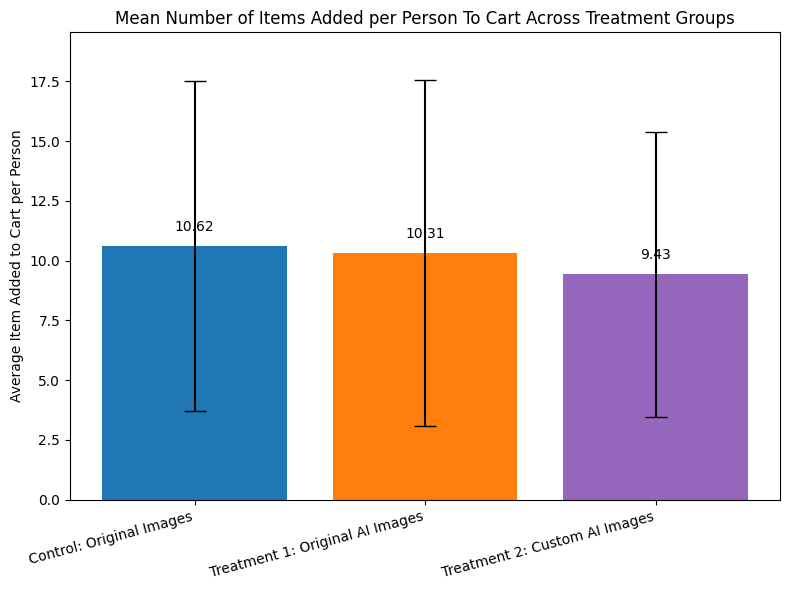

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your code outputs
groups = ['Control: Original Images', 'Treatment 1: Original AI Images', 'Treatment 2: Custom AI Images']
means = [10.62, 10.31, 9.43]
std_devs = [6.91, 7.24, 5.97]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(groups, means, yerr=std_devs, capsize=8, color=['tab:blue', 'tab:orange', 'tab:purple'])

# Add labels and title
ax.set_ylabel("Average Item Added to Cart per Person")
ax.set_title("Mean Number of Items Added per Person To Cart Across Treatment Groups")
ax.set_ylim(0, max(np.array(means) + np.array(std_devs)) + 2)
ax.set_xticklabels(groups, rotation=15, ha='right')

# Add exact values on top of bars
for bar, mean in zip(bars, means):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{mean:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<h2>One Way Anova & Tukey HSD:</h2>

In [29]:

# Step 1: Get yes counts per participant for each group
def get_yes_counts(df):
    response_cols = [col for col in df.columns if col.startswith('response_') and not col.endswith('LastChangedAt')]
    return df[response_cols].eq('Yes').sum(axis=1)

# Step 2: Extract yes counts
original_yes = get_yes_counts(original)
original_ai_yes = get_yes_counts(original_ai)
custom_ai_yes = get_yes_counts(custom_ai)

# Step 3: Combine into one DataFrame
combined_df = pd.concat([
    pd.DataFrame({'group': 'Control_Original', 'yes_count': original_yes}),
    pd.DataFrame({'group': 'Treatment_OriginalAI', 'yes_count': original_ai_yes}),
    pd.DataFrame({'group': 'Treatment_CustomAI', 'yes_count': custom_ai_yes})
])

# Step 4: Run One-Way ANOVA
model = ols('yes_count ~ group', data=combined_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Results:\n", anova_table)

# Step 5: Tukey HSD for post-hoc comparisons
tukey = pairwise_tukeyhsd(endog=combined_df['yes_count'], groups=combined_df['group'], alpha=0.05)
print("\nTukey HSD Post-Hoc Test:\n", tukey.summary())


One-Way ANOVA Results:
                sum_sq    df         F    PR(>F)
group       23.414857   2.0  0.263234  0.769186
Residual  3780.403325  85.0       NaN       NaN

Tukey HSD Post-Hoc Test:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1              group2        meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
  Control_Original   Treatment_CustomAI  -1.1964 0.7775 -5.4126 3.0197  False
  Control_Original Treatment_OriginalAI  -0.3147  0.984 -4.7046 4.0753  False
Treatment_CustomAI Treatment_OriginalAI   0.8818 0.8586  -3.113 4.8765  False
-----------------------------------------------------------------------------


<h2>T-Test between original images and custom AI images:</h2>

In [30]:
# Run independent t-test between Control and Custom AI
t_stat, p_val = ttest_ind(original_yes, custom_ai_yes, equal_var=False)  # Welch’s t-test (recommended)

print("\nT-Test: Control vs. Custom AI")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


T-Test: Control vs. Custom AI
T-statistic: 0.6895
P-value: 0.4941


<h2>Long Data:</h2>

In [31]:
# Select only response columns (exclude timestamp ones)
response_cols = [col for col in pilot.columns 
                 if col.startswith("response_") and not col.endswith("LastChangedAt")]

# Melt to long format
pilot_long = pilot.melt(
    id_vars=[
        'id', 'age', 'bodyType', 'ethnicity', 'gender', 'income',
        'shoppingFrequency', 'treatmentName', 'surveyRepresentation', 'imageQuality', 'representation'
    ],
    value_vars=response_cols,
    var_name='item',
    value_name='add_to_cart'
)

# Keep only rows where a response was recorded
pilot_long = pilot_long[pilot_long['add_to_cart'].isin(['Yes', 'No'])]

# Map Yes/No to binary
pilot_long['add_to_cart'] = pilot_long['add_to_cart'].map({'Yes': 1, 'No': 0})

# Extract item_type and price
pilot_long['item_type'] = pilot_long['item'].str.extract(r'response_(Top|Bottom|Dress)')
pilot_long['price'] = pilot_long['item'].str.extract(r'\$(\d+\.\d+)').astype(float)
pilot_long

,id,age,bodyType,ethnicity,gender,income,shoppingFrequency,treatmentName,surveyRepresentation,imageQuality,representation,item,add_to_cart,item_type,price
0,01JR3TZ3YC7W05G0MZ7NHV89TY,18-35,type2,white,female,"$50,000 - $59,999",More than once a week.,custom_ai_image,4.0,5.0,4.0,response_Top_Crew Neck T-Shirt_$9.90,1,Top,9.9
1,01JR3PTJBPPCWBBRNZF4RHSYD8,36-55,type2,east asian,female,"$70,000 - $79,999",1-5 times a year.,original_ai_image,2.0,4.0,3.0,response_Top_Crew Neck T-Shirt_$9.90,1,Top,9.9
2,01JR3RS3F4MJAD4ACQSSAB07FG,18-35,type1,white,female,"$50,000 - $59,999",Once a month / Almost once a month.,original_ai_image,3.0,4.0,4.0,response_Top_Crew Neck T-Shirt_$9.90,1,Top,9.9
3,01JR3T4KV24Q8NKYTJ0N476445,56+,type2,white,female,"$60,000 - $69,999",Once a month / Almost once a month.,original_image,4.0,4.0,4.0,response_Top_Crew Neck T-Shirt_$9.90,0,Top,9.9
4,01JR3PX02DNASFSD4XZN1DQPP3,18-35,type1,east asian,female,"$60,000 - $69,999",Once a month / Almost once a month.,custom_ai_image,5.0,4.0,4.0,response_Top_Crew Neck T-Shirt_$9.90,1,Top,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,01JRXVRV0WQ31JWK9299Q8K5MM,56+,type3,white,female,"$30,000 - $39,999",1-5 times a year.,custom_ai_image,3.0,4.0,2.0,response_Dress_Ribbed Sleeveless Bra Dress | S...,0,Dress,39.9
2636,01JRXW177PF8YBG6C1GXEBAN0W,18-35,type1,white,female,"$60,000 - $69,999",1-5 times a year.,custom_ai_image,3.0,5.0,3.0,response_Dress_Ribbed Sleeveless Bra Dress | S...,1,Dress,39.9
2637,01JRXZGDJGN366TYVV8DZWGW69,18-35,type2,east asian,female,"$50,000 - $59,999",1-5 times a year.,original_image,2.0,4.0,2.0,response_Dress_Ribbed Sleeveless Bra Dress | S...,1,Dress,39.9
2638,01JRXWEE962FHXXBCCK88JRP55,18-35,type2,black,female,"$10,000 - $19,999",Once in 1-2 weeks.,custom_ai_image,5.0,5.0,4.0,response_Dress_Ribbed Sleeveless Bra Dress | S...,1,Dress,39.9


<h2>GEE Analysis</h2>


In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Treatment

# Re-run the model with 'original_image' as the reference level
model = smf.gee(
    formula="""add_to_cart ~ C(treatmentName) + C(gender) + C(ethnicity) + C(bodyType) + age + C(income) + C(shoppingFrequency) + representation + surveyRepresentation + imageQuality + price + C(item_type)""",
    groups=pilot_long["id"],
    data=pilot_long,
    family=sm.families.Binomial()
).fit()

print(model.summary())

                               GEE Regression Results                              
Dep. Variable:                 add_to_cart   No. Observations:                 2610
Model:                                 GEE   No. clusters:                       73
Method:                        Generalized   Min. cluster size:                  30
                      Estimating Equations   Max. cluster size:                  60
Family:                           Binomial   Mean cluster size:                35.8
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 21 Apr 2025   Scale:                           1.000
Covariance type:                    robust   Time:                         01:19:57
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<h2>Effect of Treatment Category to Add To Cart Rate in Different Subgroups</h2>

Text(0.5, 1.0, 'Add To Cart Rates in Different Genders by Treatment Category')

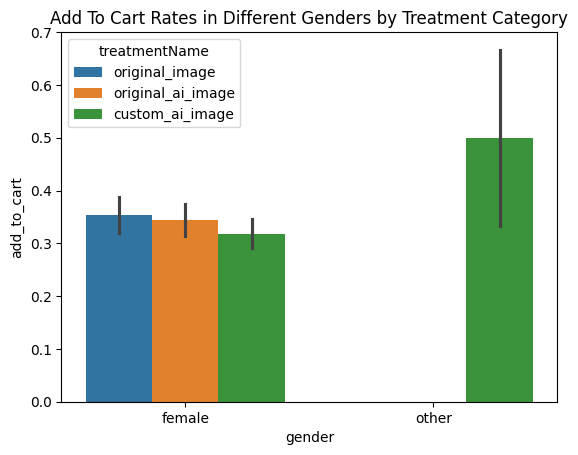

In [33]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='gender', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates in Different Genders by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates in Different Item Types by Treatment Category')

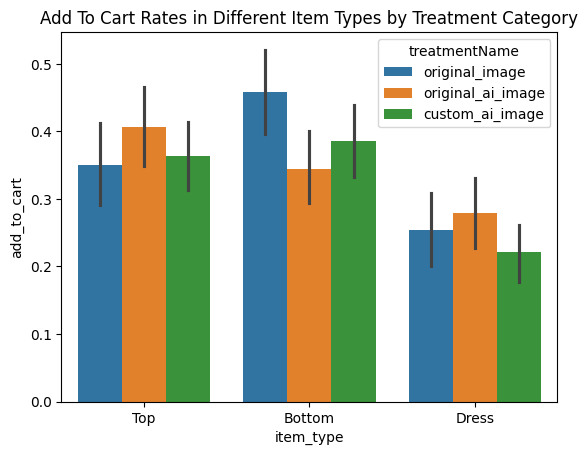

In [34]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='item_type', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates in Different Item Types by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates in Different Ages by Treatment Category')

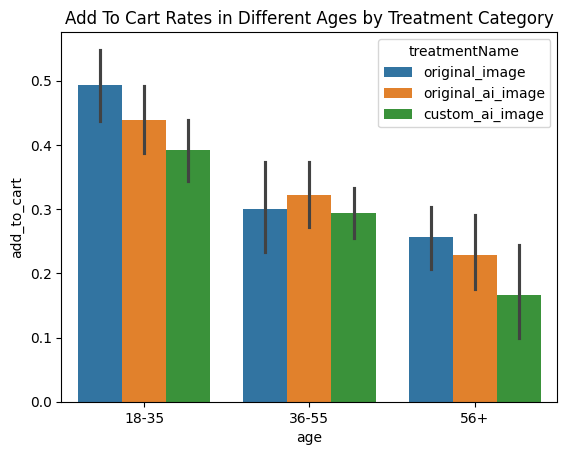

In [35]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='age', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates in Different Ages by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates in Different Ethnicities by Treatment Category')

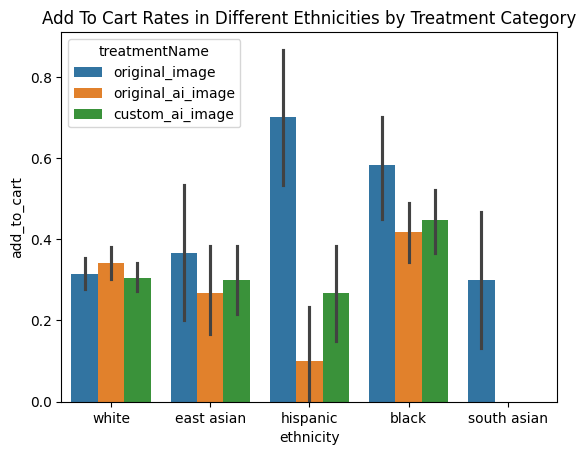

In [36]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='ethnicity', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates in Different Ethnicities by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates in Different Body Types by Treatment Category')

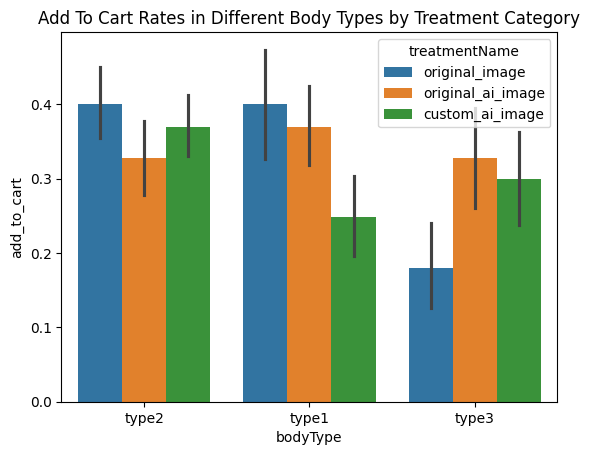

In [37]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='bodyType', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates in Different Body Types by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates for Image Representation Levels in Real Life by Treatment Category')

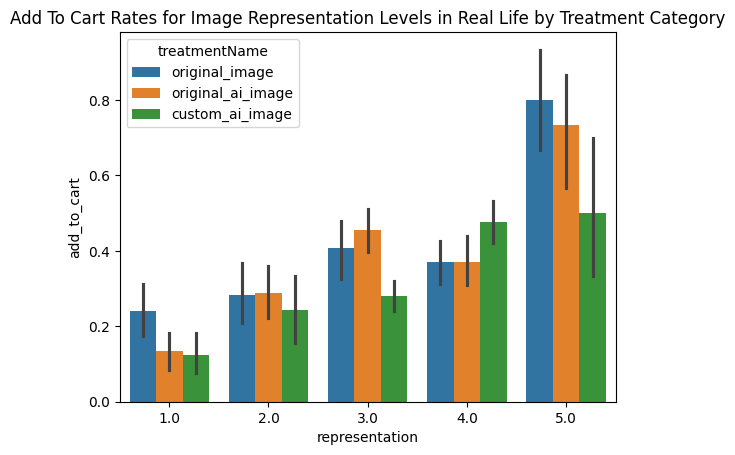

In [38]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='representation', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates for Image Representation Levels in Real Life by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates for Image Representation Levels in Survey by Treatment Category')

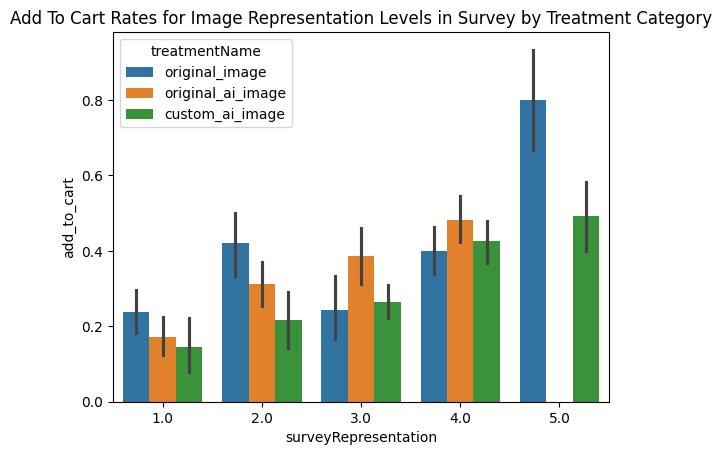

In [39]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='surveyRepresentation', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates for Image Representation Levels in Survey by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates for Image Quality Levels in Survey by Treatment Category')

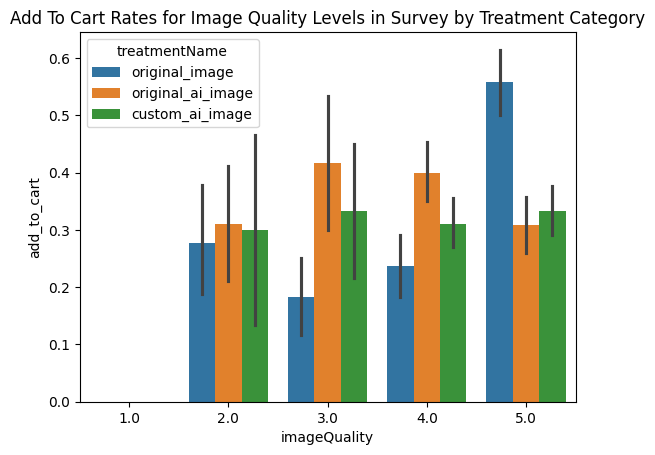

In [56]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
sns.barplot(data=pilot_long, x='imageQuality', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates for Image Quality Levels in Survey by Treatment Category')

/var/folders/m1/m1rg274x1dx4g5p4qqjl4kzc0000gn/T/ipykernel_13975/3266822375.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


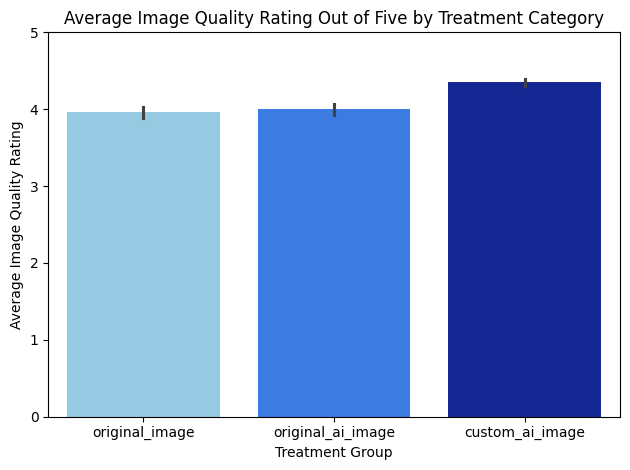

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the treatment order
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']

# Custom shades of blue for the bars
blue_palette = {
    'original_image': '#89CFF0',       # light blue
    'original_ai_image': '#1F75FE',    # medium blue
    'custom_ai_image': '#0018A8'       # dark blue
}

# Create the bar plot
sns.barplot(
    data=pilot_long,
    x='treatmentName',
    y='imageQuality',
    order=hue_order,
    palette=blue_palette
)
plt.ylim(0, 5)
plt.title('Average Image Quality Rating Out of Five by Treatment Category')
plt.xlabel('Treatment Group')
plt.ylabel('Average Image Quality Rating')
plt.tight_layout()
plt.show()

/var/folders/m1/m1rg274x1dx4g5p4qqjl4kzc0000gn/T/ipykernel_13975/247381444.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


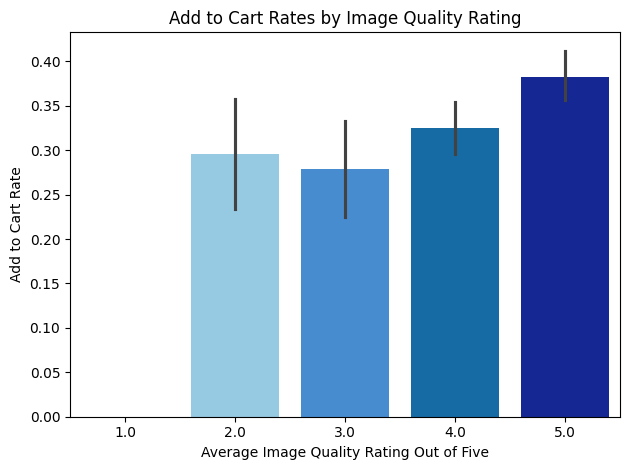

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the treatment order
hue_order = ['1.0', '2.0', '3.0', '4.0', '5.0']

# Custom shades of blue for the bars
blue_palette = {
    '1.0': '#89CFF0',       # light blue
    '2.0': '#89CFF0',    # medium blue
    '3.0': '#318CE7',    # medium blue
    '4.0': '#0070BB',    # medium blue
    '5.0': '#0018A8'       # dark blue
}

# Create the bar plot
sns.barplot(
    data=pilot_long,
    x='imageQuality',
    y='add_to_cart',
    order=hue_order,
    palette=blue_palette
)
plt.title('Add to Cart Rates by Image Quality Rating')
plt.xlabel('Average Image Quality Rating Out of Five')
plt.ylabel('Add to Cart Rate')
plt.tight_layout()
plt.show()

/var/folders/m1/m1rg274x1dx4g5p4qqjl4kzc0000gn/T/ipykernel_13975/2394688105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


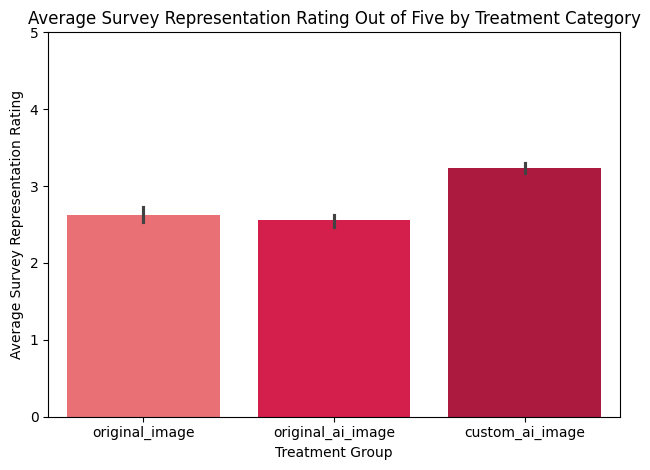

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the treatment order
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']

# Custom shades of blue for the bars
blue_palette = {
    'original_image': '#fd5c63',       # light blue
    'original_ai_image': '#F2003C',    # medium blue
    'custom_ai_image': '#C40233'       # dark blue
}

# Create the bar plot
sns.barplot(
    data=pilot_long,
    x='treatmentName',
    y='surveyRepresentation',
    order=hue_order,
    palette=blue_palette
)
plt.ylim(0, 5)
plt.title('Average Survey Representation Rating Out of Five by Treatment Category')
plt.xlabel('Treatment Group')
plt.ylabel('Average Survey Representation Rating')
plt.tight_layout()
plt.show()

/var/folders/m1/m1rg274x1dx4g5p4qqjl4kzc0000gn/T/ipykernel_13975/2350739345.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


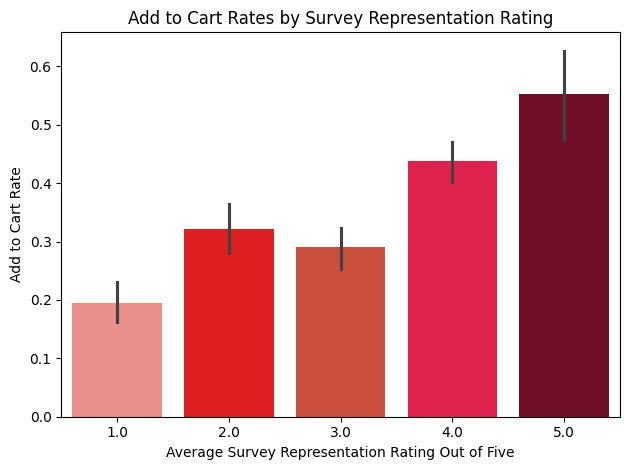

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the treatment order
hue_order = ['1.0', '2.0', '3.0', '4.0', '5.0']

# Custom shades of blue for the bars
blue_palette = {
    '1.0': '#F88379',       # light blue
    '2.0': '#FF0000',    # medium blue
    '3.0': '#E23D28',    # medium blue
    '4.0': '#FF033E',    # medium blue
    '5.0': '#800020'       # dark blue
}

# Create the bar plot
sns.barplot(
    data=pilot_long,
    x='surveyRepresentation',
    y='add_to_cart',
    order=hue_order,
    palette=blue_palette
)
plt.title('Add to Cart Rates by Survey Representation Rating')
plt.xlabel('Average Survey Representation Rating Out of Five')
plt.ylabel('Add to Cart Rate')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Add To Cart Rates for Income Levels by Treatment Category')

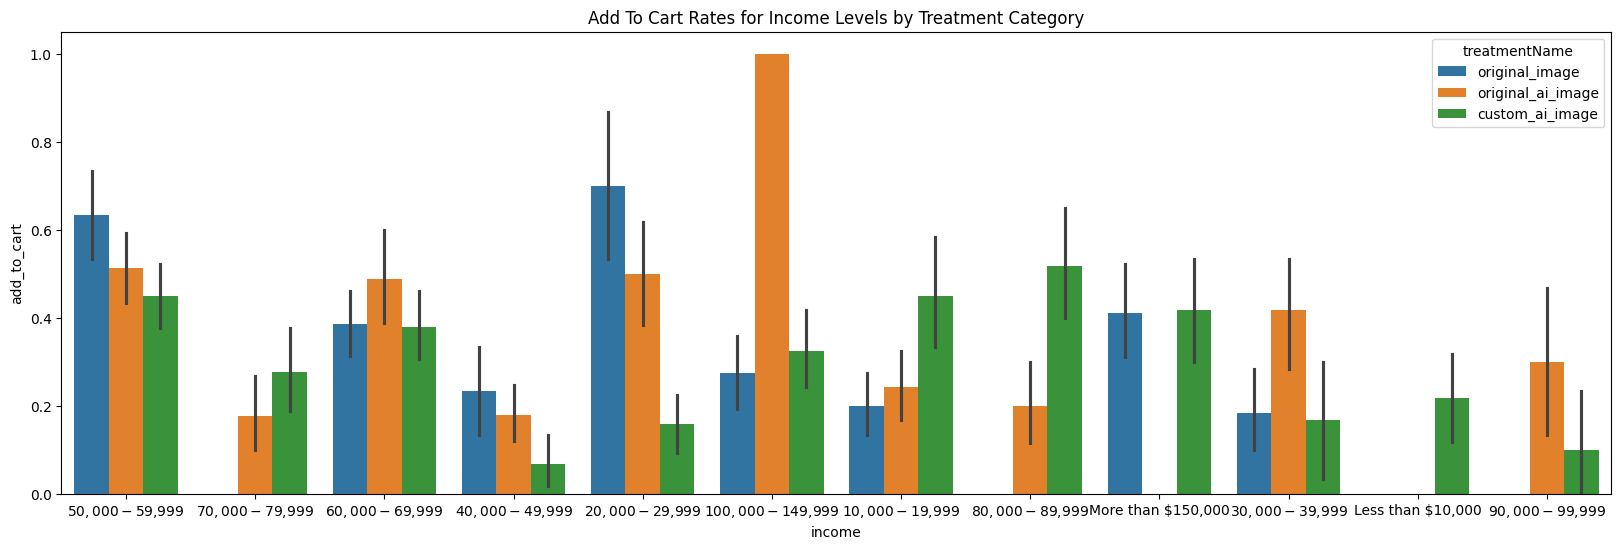

In [29]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
plt.figure(figsize=(20, 6))  # Wider plot (12 inches wide, 6 inches tall)
sns.barplot(data=pilot_long, x='income', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates for Income Levels by Treatment Category')

Text(0.5, 1.0, 'Add To Cart Rates for Shopping Frequency Levels by Treatment Category')

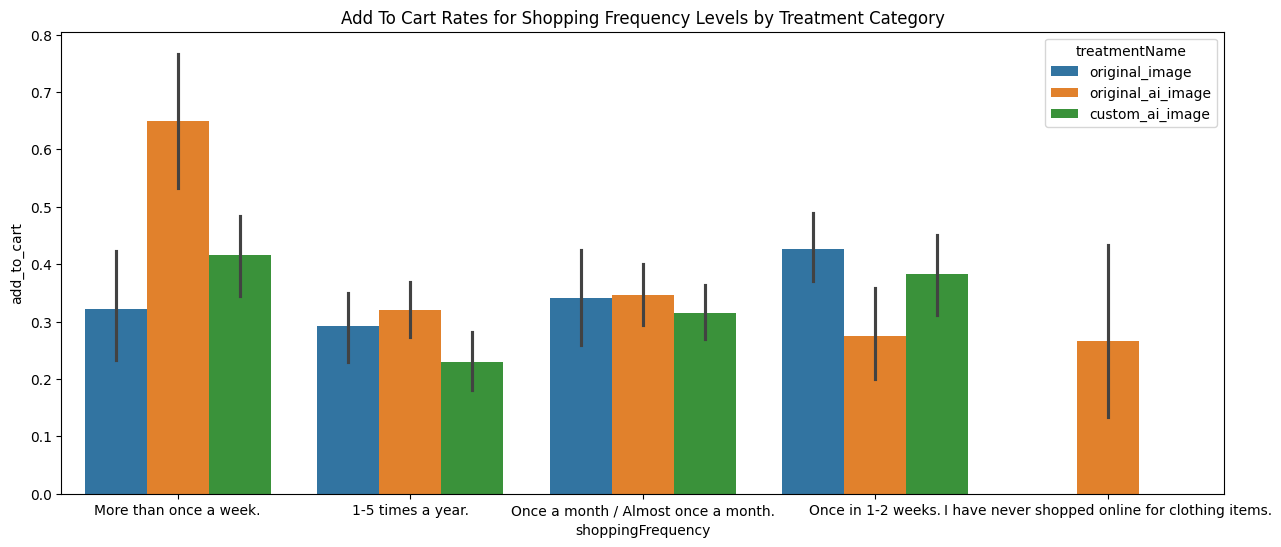

In [30]:
hue_order = ['original_image', 'original_ai_image', 'custom_ai_image']
plt.figure(figsize=(15, 6))  # Wider plot (12 inches wide, 6 inches tall)
sns.barplot(data=pilot_long, x='shoppingFrequency', y='add_to_cart', hue='treatmentName', hue_order=hue_order)
plt.title('Add To Cart Rates for Shopping Frequency Levels by Treatment Category')

<h2> Heterogeneity Analysis</h2>

In [117]:
from patsy.contrasts import Treatment
import statsmodels.formula.api as smf

covariates = [
    "C(gender)",
    "C(ethnicity)",
    "C(bodyType)",
    "age",
    "C(income)",
    "C(shoppingFrequency)",
    "representation",
    "surveyRepresentation",
    "imageQuality",
    "price",
    "C(item_type)"
]

for cov in covariates:
    print(f"\n===== TREATMENT INTERACTION WITH: {cov} =====\n")

    # Use Treatment contrast with reference set to "original_image"
    formula = f"""add_to_cart ~ C(treatmentName, Treatment(reference='original_image')) * {cov}"""

    try:
        model = smf.logit(formula=formula, data=pilot_long).fit(disp=False)
        marg_eff = model.get_margeff(at='overall', method='dydx')
        print(marg_eff.summary())

    except Exception as e:
        print(f"⚠️ Error with covariate: {cov} — {e}")



===== TREATMENT INTERACTION WITH: C(gender) =====

⚠️ Error with covariate: C(gender) — Singular matrix

===== TREATMENT INTERACTION WITH: C(ethnicity) =====

⚠️ Error with covariate: C(ethnicity) — Singular matrix

===== TREATMENT INTERACTION WITH: C(bodyType) =====

        Logit Marginal Effects       
Dep. Variable:            add_to_cart
Method:                          dydx
At:                           overall
                                                                                                       dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
C(treatmentName, Treatment(reference='original_image'))[T.custom_ai_image]                           -0.1549      0.048     -3.244      0.001      -0.249      -0.061
C(treatmentName, Treatment(reference='original_image'))[T.original_ai_image]    

<h2>Casual Forests and Average Treatment Effect</h2>

<h3>Original Image vs. Custom AI Image</h3>

In [59]:
import pandas as pd
import numpy as np
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer

# STEP 1: Setup treatment (T), outcome (Y), and covariates (X)
# Ensure binary treatment: 1 = custom_ai_image, 0 = original_image or original_ai_image
pilot_filtered = pilot_long[pilot_long["treatmentName"].isin(["original_image", "custom_ai_image"])].copy()

Y = pilot_filtered["add_to_cart"].astype(float)
T = (pilot_filtered["treatmentName"] == "custom_ai_image").astype(int)

X = pilot_filtered[[
    "gender", "ethnicity", "bodyType", "age", "income", "shoppingFrequency",
    "representation", "surveyRepresentation", "imageQuality", "price", "item_type"
]]

# STEP 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# STEP 3: Impute missing values and preserve index
imputer = SimpleImputer(strategy="most_frequent")
X_encoded = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns, index=X_encoded.index)

# STEP 4: Fit causal forest
est = CausalForestDML(
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    model_t=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),  # Regressor here, not classifier
    n_estimators=100,
    min_samples_leaf=5,
    max_depth=10,
    verbose=1,
    random_state=42
)

est.fit(Y, T, X=X_encoded)

# STEP 5: Estimate treatment effects
te_preds = est.effect(X_encoded)

# STEP 6: Display results
print(f"\n✅ Average Treatment Effect (ATE): {np.mean(te_preds):.4f}")
print("\n📌 Sample Individual-Level Treatment Effects:")
print(pd.Series(te_preds, name="TreatmentEffect"))



✅ Average Treatment Effect (ATE): -0.0707

📌 Sample Individual-Level Treatment Effects:
0       0.135695
1       0.176012
2       0.147678
3       0.545702
4       0.016909
          ...   
1736   -0.710932
1737   -0.102872
1738   -0.849245
1739    0.444864
1740   -1.150110
Name: TreatmentEffect, Length: 1741, dtype: float64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


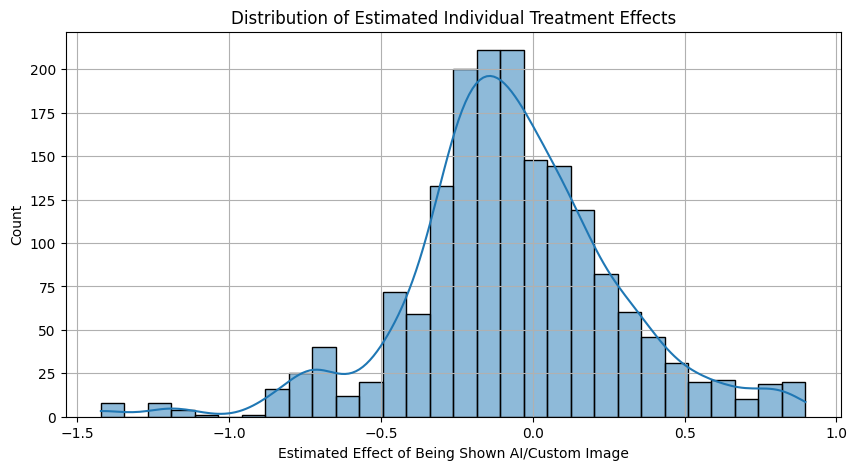

In [60]:
# STEP 1: Add individual treatment effects to your DataFrame
X_encoded["TreatmentEffect"] = te_preds  # te_preds = est.effect(X_encoded)

# STEP 2: Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(X_encoded["TreatmentEffect"], bins=30, kde=True)
plt.title("Distribution of Estimated Individual Treatment Effects")
plt.xlabel("Estimated Effect of Being Shown AI/Custom Image")
plt.ylabel("Count")
plt.grid(True)
plt.show()


<h3>Original Image vs. Original AI Image</h3>

In [61]:
import pandas as pd
import numpy as np
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer

# STEP 1: Setup treatment (T), outcome (Y), and covariates (X)
# Ensure binary treatment: 1 = custom_ai_image, 0 = original_image or original_ai_image
pilot_filtered = pilot_long[pilot_long["treatmentName"].isin(["original_image", "original_ai_image"])].copy()

Y = pilot_filtered["add_to_cart"].astype(float)
T = (pilot_filtered["treatmentName"] == "original_ai_image").astype(int)

X = pilot_filtered[[
    "gender", "ethnicity", "bodyType", "age", "income", "shoppingFrequency",
    "representation", "surveyRepresentation", "imageQuality", "price", "item_type"
]]

# STEP 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# STEP 3: Impute missing values and preserve index
imputer = SimpleImputer(strategy="most_frequent")
X_encoded = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns, index=X_encoded.index)

# STEP 4: Fit causal forest
est = CausalForestDML(
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    model_t=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),  # Regressor here, not classifier
    n_estimators=100,
    min_samples_leaf=5,
    max_depth=10,
    verbose=1,
    random_state=42
)

est.fit(Y, T, X=X_encoded)

# STEP 5: Estimate treatment effects
te_preds = est.effect(X_encoded)

# STEP 6: Display results
print(f"\n✅ Average Treatment Effect (ATE): {np.mean(te_preds):.4f}")
print("\n📌 Sample Individual-Level Treatment Effects:")
print(pd.Series(te_preds, name="TreatmentEffect"))


✅ Average Treatment Effect (ATE): -0.0319

📌 Sample Individual-Level Treatment Effects:
0       0.128997
1      -0.155642
2       0.198024
3      -0.129225
4       0.081708
          ...   
1585    0.068427
1586   -0.408818
1587    0.027975
1588   -0.391993
1589   -0.245524
Name: TreatmentEffect, Length: 1590, dtype: float64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


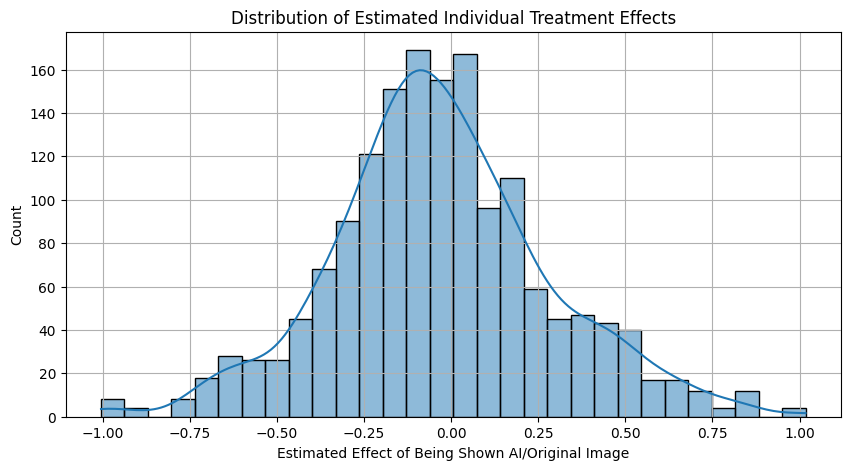

In [62]:
# STEP 1: Add individual treatment effects to your DataFrame
X_encoded["TreatmentEffect"] = te_preds  # te_preds = est.effect(X_encoded)

# STEP 2: Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(X_encoded["TreatmentEffect"], bins=30, kde=True)
plt.title("Distribution of Estimated Individual Treatment Effects")
plt.xlabel("Estimated Effect of Being Shown AI/Original Image")
plt.ylabel("Count")
plt.grid(True)
plt.show()